# Neural Network - Single Layer

In [1]:
!cd

C:\Users\dahlmoon\Documents\GitHub\tensorflow_ipynb


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

-------------------------------------------------------------------
## 1. Data (mnist)

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(r"C:\Users\dahlmoon\Documents\GitHub\tensorflow_ipynb\MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\dahlmoon\Documents\GitHub\tensorflow_ipynb\MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\dahlmoon\Documents\GitHub\tensorflow_ipynb\MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting C:\Users\dahlmoon\Documents\GitHub\tensorflow_ipynb\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting C:\Users\dahlmoon\Documents\GitHub\tensorflow_ipynb\MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


-------------------------------------------------------------------------
## 2. Simple Layer

### 2-1. Hyper-parameter

In [5]:
training_epochs = 25
batch_size      = 100
learning_rate   = 0.001
display_step    = 1

### 2-2. Input

In [6]:
# 28 * 28 = 784
x = tf.placeholder("float", [None, 784])
# 0부터 9까지
y = tf.placeholder("float", [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

### 2-3. Optimization

In [7]:
activation = tf.nn.softmax(tf.matmul(x, W) + b)
cost       = tf.reduce_mean(-tf.reduce_sum(y*tf.log(activation), reduction_indices = 1))
optimizer  = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### 2-4. tf.Session

Epoch:  0001 cost:  2.045368037
Epoch:  0002 cost:  1.654527778
Epoch:  0003 cost:  1.394464800
Epoch:  0004 cost:  1.217187467
Epoch:  0005 cost:  1.091393817
Epoch:  0006 cost:  0.998409498
Epoch:  0007 cost:  0.927097015
Epoch:  0008 cost:  0.870716375
Epoch:  0009 cost:  0.824991920
Epoch:  0010 cost:  0.787101486
Epoch:  0011 cost:  0.755147379
Epoch:  0012 cost:  0.727812628
Epoch:  0013 cost:  0.704108935
Epoch:  0014 cost:  0.683336378
Epoch:  0015 cost:  0.664968501
Epoch:  0016 cost:  0.648585583
Epoch:  0017 cost:  0.633877185
Epoch:  0018 cost:  0.620563761
Epoch:  0019 cost:  0.608469510
Epoch:  0020 cost:  0.597411446
Epoch:  0021 cost:  0.587256395
Epoch:  0022 cost:  0.577900936
Epoch:  0023 cost:  0.569231686
Epoch:  0024 cost:  0.561191898
Epoch:  0025 cost:  0.553693546
Optimization DONE!
Accuracy:  0.8783
Label:  [4]
Predict:  [4]


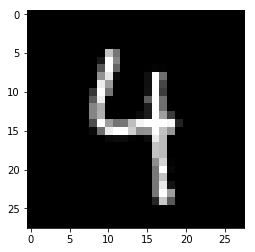

In [8]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        ## mini batch
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)

        ## mini batch training
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict = {x:batch_xs, y:batch_ys})
            avg_cost += sess.run(cost, feed_dict = {x:batch_xs, y:batch_ys}) / total_batch

        ## log print
        if epoch % display_step == 0:
            print("Epoch: ", '%04d' % (epoch + 1), "cost: ", "{:.9f}".format(avg_cost))

    print("Optimization DONE!")
    print("==========================================================")

    
    ## test
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) ## cast: same shape as x
    print("Accuracy: ", accuracy.eval({x: mnist.test.images, y:mnist.test.labels}))
    print("==========================================================")

    
    ## predict
    r = random.SystemRandom().randint(0, mnist.test.num_examples -1) ## indx random search

    print("Label: ",   sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))                ## Label:   [2]
    print("Predict: ", sess.run(tf.argmax(activation,1), {x:mnist.test.images[r:r+1]})) ## Predict: [2]

    
    ## plot
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'gray', interpolation = 'nearest')
    plt.show()

--------------------------------------------------------------------------------

*End of Code*